Handling Imblanced Classes

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv("Customer-Churn-Prediction.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

Train-Test validation split

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=.70,random_state=42)

In [9]:
train.shape

(4930, 21)

In [10]:
test.shape

(2113, 21)

In [11]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


In [12]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1695,4906-ZHGPK,Male,0,Yes,Yes,54,Yes,Yes,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,70.70,3770,No
1095,7439-DKZTW,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.55,80.55,No
3889,2592-HODOV,Male,0,No,No,13,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.30,259.65,No
3667,7826-VVKWT,Female,1,Yes,Yes,24,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,96.55,2263.45,No
2902,1658-TJVOA,Female,1,No,No,6,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.10,450.9,No


In [13]:
testing, validation = train_test_split(test, train_size=.50, random_state=42) #15% test and 15% for validation

In [14]:
testing.shape

(1056, 21)

In [15]:
validation.shape

(1057, 21)

In [16]:
df.shape

(7043, 21)

In [17]:
train.shape

(4930, 21)

In [18]:
testing.to_csv('testing.csv')

In [19]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [20]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(7043, 21)

In [24]:
not_churned = (5174/(5174+1869)) *100
churned = (1869/(5174+1869)) * 100

print("Not churned {} percent of total people".format(not_churned))
print("Churned {} percent of total people".format(churned))

Not churned 73.4630129206304 percent of total people
Churned 26.536987079369588 percent of total people


<Axes: xlabel='count', ylabel='Churn'>

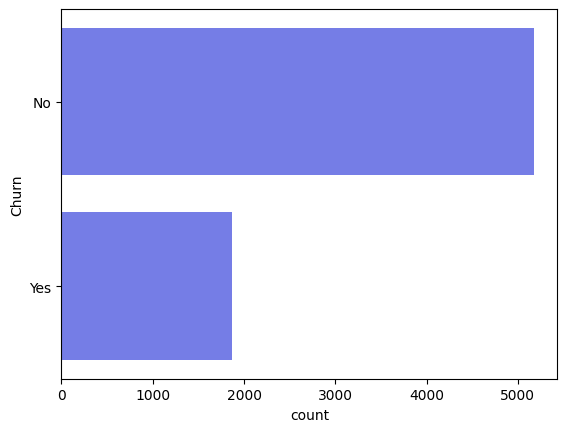

In [27]:
sns.countplot(df['Churn'],color="#626df9")

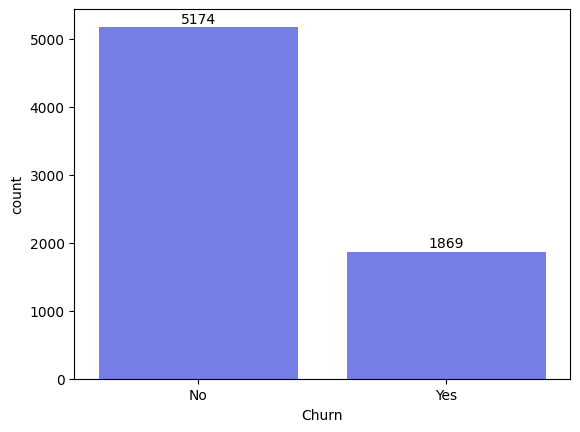

In [29]:
sns.countplot(x=df["Churn"], color="#626df9")

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() /2, p.get_height() + 60, int(p.get_height()), ha='center')

plt.show()

In [ ]:
#38min